<a href="https://colab.research.google.com/github/Gabrielvss/Fetal-Health-Classification/blob/main/2_Model_build.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pré-processamento 
Sepranado os conjuntos de treinamento e teste.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
df = pd.read_csv("fetal_health.csv")


Separando as labels do alvo.

In [ ]:

X = df.iloc[:,:-1]
y = df.iloc[:,-1]


Os dados serão divididos em dois subconjuntos:

* Treino Não balanceado
* Treino Balanceado 
* Validação

o balanceamento é discutido no notebook de análise dos dados.

In [ ]:
#Conjunto de treino 
X1_train,X_test,y1_train,y_test = train_test_split(X,y,test_size = 0.2,random_state=42)

In [ ]:
#Conjnto de validação e de treino não balanceado
X2_train,X_val,y2_train,y_val = train_test_split(X1_train,y1_train,test_size=0.2,random_state=42)

## Escalonamento dos dados

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X2_train=scaler.fit_transform(X2_train)
X_val=scaler.transform(X_val)
X_test=scaler.transform(X_test)

## Balanceamento dos dados

In [ ]:
#conjunto de dados balanceados
from imblearn.over_sampling import RandomOverSampler
os =  RandomOverSampler()
X_train_res, y_train_res = os.fit_sample(X2_train, y2_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


# Treinando diferentes Modelos
A dinãmica dos treinamentos consistem em treinar os modelos nos conjuntos balanceados e não balanceados e posteriormente a análise desses resultados.

In [ ]:
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score


O desempenho dos modelos será avaliado pela acurácia, esta será obtida pelo 
metódo de validação cruzada que divide os dados em subconjuntos (folds) e a cada interação um subconjunto diferente será utilizado para o teste e o restante para oo treino.


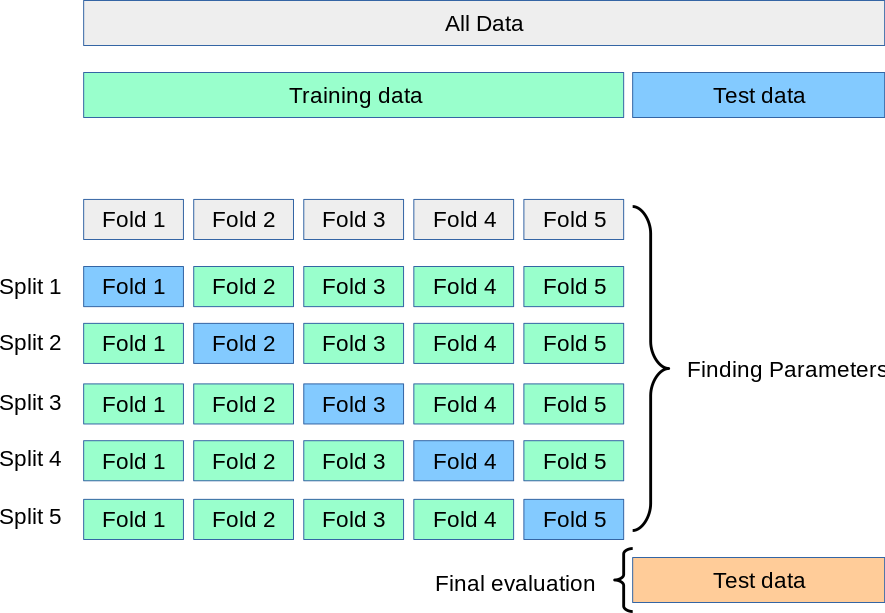

O padrão de folds será de dez.

Fonte: https://scikit-learn.org/stable/modules/cross_validation.html

A acurácia diz a respeito ao total de acertos possíveis feitos pelo modelo:
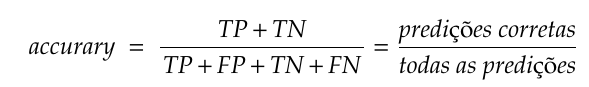

* TP - Verdadeiro Positivo
* FP - Falso Positivo
* TN - Verdadeiro Negativo
* FN - Falso negativo

Esses tópicos serão melhor abordados mais a frente.

Fonte: https://medium.com/data-hackers/entendendo-o-que-%C3%A9-matriz-de-confus%C3%A3o-com-python-114e683ec509

In [ ]:
#retorna a acurácia e o desvio padrão
def get_accuracy(clf,X,y):
  scores = cross_val_score(clf, X, y, cv=10)
  return (scores.mean(),scores.std())

1 - Linear Discriminant Analysis

In [ ]:
clf1 = LinearDiscriminantAnalysis()
lda_scores = get_accuracy(clf1.fit(X2_train,y2_train), X_val, y_val)
lda_scores_res = get_accuracy(clf1.fit(X_train_res,y_train_res), X_val, y_val)



In [ ]:
print(f'Não balanceado acurácia: {lda_scores[0]} std: {lda_scores[1]}')
print(f'Balanceado acurácia: {lda_scores_res[0]} std: {lda_scores_res[1]}')

Não balanceado acurácia: 0.8588235294117647 std: 0.06280634265900772
Balanceado acurácia: 0.8588235294117647 std: 0.06280634265900772


2 - Árvores de decisão

In [ ]:
clf2 = DecisionTreeClassifier()
dtc_scores = get_accuracy(clf2.fit(X2_train,y2_train), X_val, y_val)
dtc_scores_res = get_accuracy(clf2.fit(X_train_res,y_train_res), X_val, y_val)

In [ ]:
print(f'Não balanceado acurácia: {dtc_scores[0]} std: {dtc_scores[1]}')
print(f'Balanceado acurácia: {dtc_scores_res[0]} std: {dtc_scores_res[1]}')

Não balanceado acurácia: 0.8794117647058824 std: 0.056498155036172205
Balanceado acurácia: 0.8794117647058824 std: 0.05000000000000002


3 - Maquinas de vetores de Suporte (SVM)

In [ ]:
clf3 = SVC()
svc_scores = get_accuracy(clf3.fit(X2_train,y2_train), X_val, y_val)
svc_scores_res = get_accuracy(clf3.fit(X_train_res,y_train_res), X_val, y_val)

In [ ]:
print(f'Não balanceado acurácia: {svc_scores[0]} std: {svc_scores[1]}')
print(f'Balanceado acurácia: {svc_scores_res[0]} std: {svc_scores_res[1]}')

Não balanceado acurácia: 0.8323529411764705 std: 0.06450503588076853
Balanceado acurácia: 0.8323529411764705 std: 0.06450503588076853


4 - Floresta Aleátoria

In [ ]:
clf4 = RandomForestClassifier()
rf_scores = get_accuracy(clf4.fit(X2_train,y2_train), X_val, y_val)
rf_scores_res = get_accuracy(clf4.fit(X_train_res,y_train_res), X_val, y_val)

In [ ]:
print(f'Não balanceado acurácia: {rf_scores[0]} std: {rf_scores[1]}')
print(f'Balanceado acurácia: {rf_scores_res[0]} std: {rf_scores_res[1]}')

Não balanceado acurácia: 0.9088235294117647 std: 0.056498155036172205
Balanceado acurácia: 0.8911764705882353 std: 0.04930310180658886


## Resultados
Os resultados considerados serão os feitos a partir dos conjuntos balanceados.

In [ ]:
models = ['Linear Discriminant Analysis','Árvores de decisão','Maquinas de vetores de Suporte','Floresta Aleátoria']
accuracys = [lda_scores_res[0],dtc_scores_res[0],svc_scores_res[0],rf_scores_res[0]]
stds = [lda_scores_res[1],dtc_scores_res[1],svc_scores_res[1],rf_scores_res[1]]
models_results = pd.concat([pd.DataFrame(models),pd.DataFrame(accuracys)],axis=1)
models_results = pd.concat([models_results,pd.DataFrame(stds)],axis=1)
models_results.columns = ['Modelos', 'Acurácias','std']
models_results

,Modelos,Acurácias,std
0,Linear Discriminant Analysis,0.858824,0.062806
1,Árvores de decisão,0.879412,0.050000
2,Maquinas de vetores de Suporte,0.832353,0.064505
3,Floresta Aleátoria,0.891176,0.049303


Representação gráfica

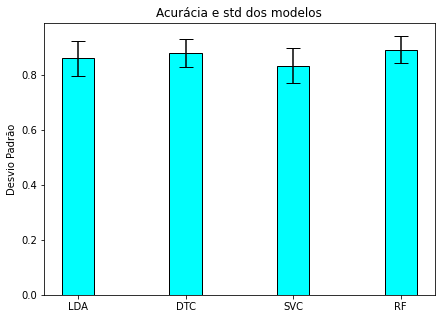

In [ ]:
import matplotlib.pyplot as plt
ind=[0,1,2,3]
fig = plt.figure(figsize=(7,5))
plt.bar(ind, accuracys, width = 0.3, color = 'cyan', edgecolor = 'black', yerr=stds, capsize=7)
plt.xticks(ind,['LDA','DTC','SVC', 'RF'])
plt.title('Acurácia e std dos modelos')
plt.ylabel('Desvio Padrão')
plt.show();

### Outras métricas de avaliação
* AUC e Curva ROC

A área sob a curva de Precisão x Recall (AUC) é uma ferramenta útil para avaliar a qualidade da separação de classes. Para problemas multi-classe como este que possui três categprias, é feita uma análise de uma classe em comparação a todas as outras. para isso será feita uma binarização das classes.

fonte:https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.label_binarize.html#sklearn.preprocessing.label_binarize

In [ ]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_auc_score

def get_auc_multiclass(clf):
  clf = clf.fit(X_train_res,y_train_res)
  y_pred = clf.predict(X_val)
  y_test =  label_binarize(y_val,classes=[1, 2, 3])
  y_pred = label_binarize(y_pred,classes=[1, 2, 3])
  return roc_auc_score(y_test, y_pred)

In [ ]:
lda_auc = get_auc_multiclass(clf1)
dtc_auc = get_auc_multiclass(clf2)
svc_auc = get_auc_multiclass(clf3)
rf_auc = get_auc_multiclass(clf4)


In [ ]:
aucs = pd.concat([pd.DataFrame(models),pd.DataFrame([lda_auc,dtc_auc,svc_auc,rf_auc])], axis=1)
aucs.columns=['Modelos', 'AUC']
aucs

,Modelos,AUC
0,Linear Discriminant Analysis,0.867966
1,Árvores de decisão,0.892765
2,Maquinas de vetores de Suporte,0.894991
3,Floresta Aleátoria,0.913589


A partir da análise do AUC em comparação a acurácia, houve quase que um empate entre o SVM, as árvores de decisçao e as florestas aleátorias. 

#### Matriz de Confusão
Essa matriz permite uma visualisação rápida de comparação entre as váriaveis que o modelo mais acerta ou mais erra, como solicitado na orientação do projeto as matrizes de cada modelo foram obtidas sem o uso de bibliotecas, com a função abaixo.

In [ ]:
def confusion_matrix(y_true,clf,labels):
  confusion_matrix = [[0 for columns in range(len(labels))] for rows in range(len(labels))]
  y_true=list(y_true)
  y_pred= list(clf.predict(X_val))
  for i in range(len(y_true)):
    if y_true[i]==y_pred[i]:
      if y_true[i] == labels[0]:
        confusion_matrix[0][0]+=1
      elif y_true[i] == labels[1]:
        confusion_matrix[1][1]+=1
      elif y_true[i] == labels[2]:
        confusion_matrix[2][2]+=1

    if y_true[i]!=y_pred[i]:
      if (y_true[i]==labels[0] and y_pred[i]==labels[1]):
        confusion_matrix[0][1]+=1 
      elif (y_true[i]==labels[0] and y_pred[i]==labels[2]):
        confusion_matrix[0][2]+=1  
      elif (y_true[i]==labels[1] and y_pred[i]==labels[0]):
        confusion_matrix[1][0]+=1  
      elif (y_true[i]==labels[1] and y_pred[i]==labels[2]):
        confusion_matrix[1][2]+=1  
      elif (y_true[i]==labels[2] and y_pred[i]==labels[0]):
        confusion_matrix[2][0]+=1  
      elif (y_true[i]==labels[2] and y_pred[i]==labels[1]):
        confusion_matrix[2][1]+=1
  return confusion_matrix          
  


In [ ]:
#encontrando as matrizes 
labels = [1,2,3]
lda_matrix = confusion_matrix(y_val,clf1,labels)
dtc_matrix = confusion_matrix(y_val,clf2,labels)
svc_matrix = confusion_matrix(y_val,clf3,labels)
rf_matrix = confusion_matrix(y_val,clf4,labels)

In [ ]:
all_matrix = [lda_matrix,dtc_matrix,svc_matrix,rf_matrix]

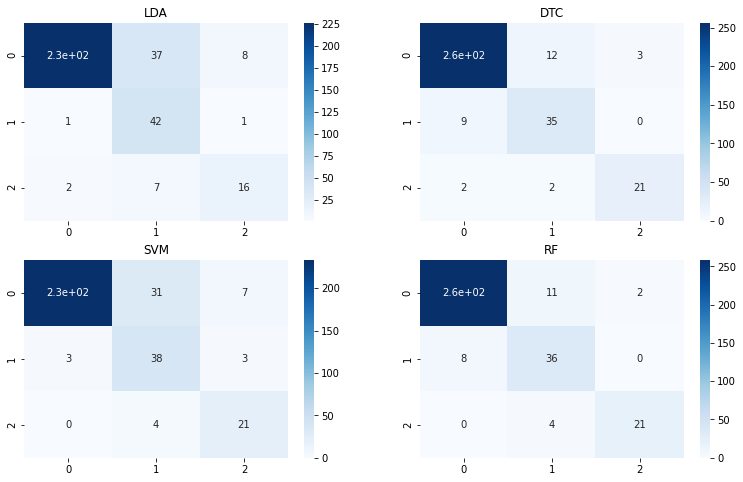

In [ ]:
import seaborn as sns
#visualizando as matrizes
fig, axes = plt.subplots(2,2, figsize=(13,8))
titles=['LDA','DTC','SVM','RF']
for i,matrix in enumerate(all_matrix):
  sns.heatmap(matrix,annot=True, cmap='Blues', ax=axes.flatten()[i])
  if i<=1:
    axes[0,i].set_title(titles[i])
  else: axes[1,i-2].set_title(titles[i])   


De posse da Matriz de confusão é possível encontrar outras métricas que caracteriazam melhor o funcionamento do modelo, como:

* Sensibilidade (Recall): a proporção de casos positivos que foram identificados corretamente.

* Especificidadeade:  a proporção de casos negativos que foram identificados corretamente.

Como existem três classes os casos positivos e negativos não ficam tão claros, para o melhor o entendimento será utilizado o seguinte exemplo:

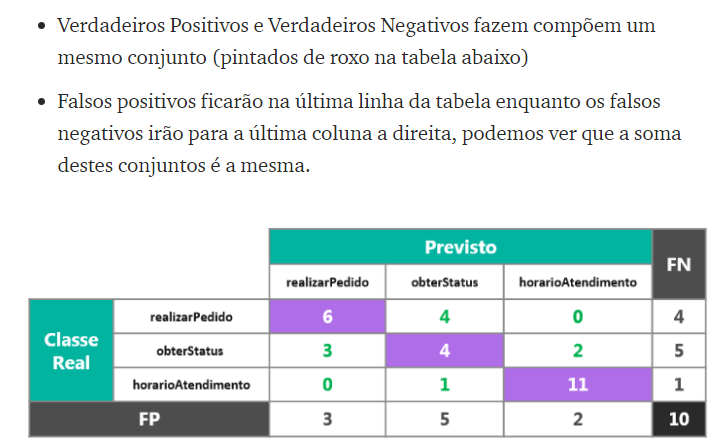

Fonte: https://medium.com/as-m%C3%A1quinas-que-pensam/m%C3%A9tricas-comuns-em-machine-learning-como-analisar-a-qualidade-de-chatbots-inteligentes-conceitos-a5b586053973

Dessa forma é possível fazer uma análise global dessas métricas, nesse caso os verdadeiros positivos e os verdadeiros negativos possuem os mesmos valores.

In [ ]:
#função para calcular a sensibilidade e a especificidade
def get_sensibility(matrix):
  Tp=0 #Tp=Tn
  for i in range(3):
    Tp += matrix[i][i] 
  sensibility = Tp/len(X_val)  
  return sensibility

Como TP é igual ao Tn a sensibilidade e a especificidade terão o mesmo valor.

In [ ]:
print(f'Sensibilidade/Especificidade:')
print(f'LDA: {get_sensibility(lda_matrix)}')
print(f'SVM: {get_sensibility(svc_matrix)}')
print(f'RF: {get_sensibility(rf_matrix)}')
print(f'DTC: {get_sensibility(dtc_matrix)}')

Sensibilidade/Especificidade:
LDA: 0.8352941176470589
SVM: 0.8588235294117647
RF: 0.9264705882352942
DTC: 0.9176470588235294


Para calcular o F1-score temos:

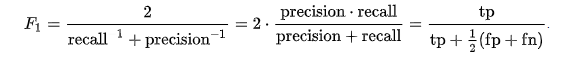

Fonte: https://en.wikipedia.org/wiki/F-score

In [ ]:
def get_fscore(matrix):
  tp=0 
  fn = 0
  fp = 0
  for i in range(3):
    tp += matrix[i][i]
    if i!=0:
      fn += matrix[0][i]
      fp += matrix[i][0]
    if i!=1:
      fn += matrix[1][i]
      fp += matrix[i][1]
    if i!=2:
      fn += matrix[2][i]
      fp += matrix[i][2]

  return (tp/(tp+(0.5*(fp+fn))))    


In [ ]:
print(f'F1-score:')
print(f'LDA: {get_fscore(lda_matrix)}')
print(f'SVM: {get_fscore(svc_matrix)}')
print(f'RF: {get_fscore(rf_matrix)}')
print(f'DTC: {get_fscore(dtc_matrix)}')

F1-score:
LDA: 0.8352941176470589
SVM: 0.8588235294117647
RF: 0.9264705882352942
DTC: 0.9176470588235294


Como o F-score é o balanço entre Precisão e Recall ou Sensibilidade e especificidade, os valores realmente são iguais.

In [ ]:
sensibility = [get_sensibility(lda_matrix),get_sensibility(dtc_matrix),get_sensibility(svc_matrix),get_sensibility(rf_matrix)]
f_scores= [get_fscore(lda_matrix),get_fscore(dtc_matrix),get_fscore(svc_matrix),get_fscore(rf_matrix)]
other_metrics = pd.concat([pd.DataFrame(sensibility),pd.DataFrame(f_scores)],axis=1)
other_metrics.columns = ['Sensibilidade/Especificidade','F1-score']
other_metrics

,Sensibilidade/Especificidade,F1-score
0,0.835294,0.835294
1,0.917647,0.917647
2,0.858824,0.858824
3,0.926471,0.926471


## Compilando os Resultados

In [ ]:
final_results = pd.concat([pd.concat([models_results,aucs.drop(['Modelos'],axis=1)],axis=1),other_metrics], axis=1)
final_results


,Modelos,Acurácias,std,AUC,Sensibilidade/Especificidade,F1-score
0,Linear Discriminant Analysis,0.858824,0.062806,0.867966,0.835294,0.835294
1,Árvores de decisão,0.879412,0.050000,0.892765,0.917647,0.917647
2,Maquinas de vetores de Suporte,0.832353,0.064505,0.894991,0.858824,0.858824
3,Floresta Aleátoria,0.891176,0.049303,0.913589,0.926471,0.926471
